In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import random
import json
import pickle
import importlib

In [2]:
import classification_utils as classiutils
import class_weights_utils as cwutils
import modelutils
importlib.reload(classiutils)
importlib.reload(cwutils)
importlib.reload(modelutils)

<module 'modelutils' from '/home/ilambda/goods_viewer/Debasish/modelutils.py'>

In [3]:
IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224
IMAGE_CHANNELS = 3
IMAGE_SIZE = (IMAGE_WIDTH, IMAGE_HEIGHT)
RGB_IMAGE_SIZE = (IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)

TRAIN_IMAGE_PATH = '/home/ilambda/goods_viewer/Debasish/dataset/1_train_split/whole_resize'
TEST_IMAGE_PATH = '/home/ilambda/goods_viewer/Debasish/dataset/1_eval_img_resize/'

In [4]:
import tensorflow as tf
keras = tf.keras

In [5]:
training_df = pd.read_csv('attributes_training_df.csv', index_col='index')
testing_df = pd.read_csv('attributes_testing_df.csv', index_col='index')

features = modelutils.read_list_from_disk('filtered_features.txt')

print(f"Training shape: {training_df.shape}")
print(f"Testing shape: {testing_df.shape}")
print(f"Features length: {len(features)}")

Training shape: (96197, 232)
Testing shape: (11453, 232)
Features length: 112


### Use pickle to dump/load a list

In [6]:
with open('features.pickle','wb') as f:
    pickle.dump(features,f)

In [7]:
with open('features.pickle','rb') as f:
    f_p = pickle.load(f)

In [8]:
data_gen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255, 
                                                        preprocessing_function=keras.applications.resnet50.preprocess_input)

test_gen = data_gen.flow_from_dataframe(testing_df,directory=TEST_IMAGE_PATH, 
                                        batch_size=32, shuffle=False,
                                        x_col='filename', y_col=features, 
                                        class_mode='other', target_size=IMAGE_SIZE)

Found 11453 validated image filenames.


In [9]:
history_alllayers_imnet_d3 = modelutils.read_history('new_filt_attribs_all_layers_imnet_d6_e_20_history_2020_03_06_14_35_22.json')
history_alllayers_imnet_d3_1 = modelutils.read_history('new_filt_attribs_all_layers_imnet_d6.1_e_20_history_2020_03_06_19_10_47.json')

In [11]:
def mean_precision_recall(history, axis=1):
    mean_precision = np.mean(history['val_precision'], axis=1)
    mean_recall = np.mean(history['val_recall'], axis=1)
    
    return mean_precision, mean_recall

In [175]:
mean_prec_d3, mean_rec_d3 = mean_precision_recall(history_alllayers_imnet_d3)
mean_prec_d3_1, mean_rec_d3_1 = mean_precision_recall(history_alllayers_imnet_d3_1)

In [187]:
mean_prec_d3

array([0.61717321, 0.66354333, 0.67173582, 0.67239802, 0.67079946,
       0.6647342 , 0.66265203, 0.6639664 , 0.65464383, 0.65612964,
       0.65094151, 0.64892363, 0.63632265, 0.64842087, 0.63818526,
       0.63951634, 0.6336492 , 0.62576454, 0.63324644, 0.62698989])

In [186]:
mean_prec_d3_1

array([0.61356602, 0.61658316, 0.60604738, 0.60160331, 0.60960239,
       0.60771807, 0.60927398, 0.57968597, 0.57280182, 0.59339414,
       0.59810701, 0.601593  , 0.59337938, 0.59796771, 0.60150738,
       0.606017  , 0.59066587, 0.58681047, 0.58296128, 0.59705811])

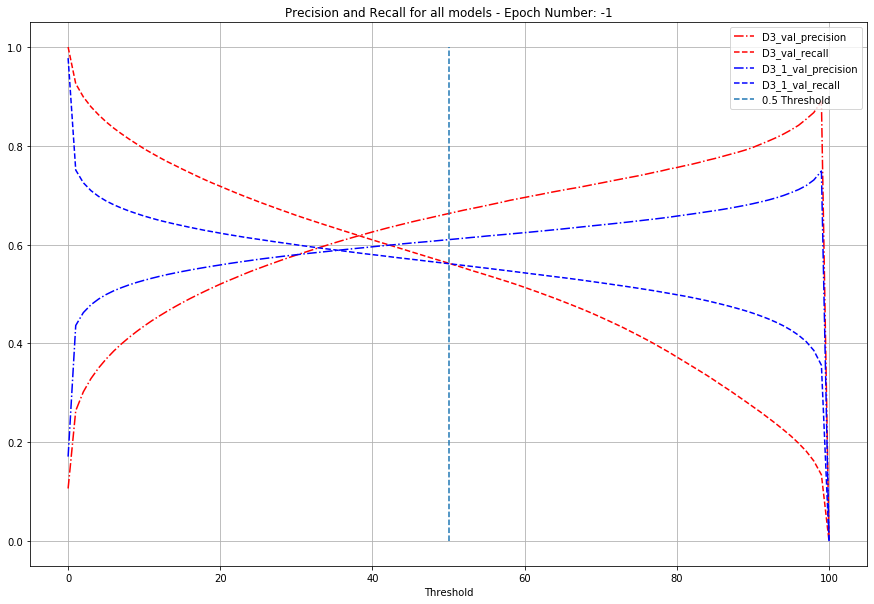

In [171]:
history_dict = {"D3": history_alllayers_imnet_d3, "D3_1": history_alllayers_imnet_d3_1}
classiutils.plot_precision_recall_intersection(history_dict)

model_alllayers_imnet_d3 = keras.models.load_model('new_filt_attribs_all_layers_imnet_d6_e_20_model_2020_03_06_14_35_22.h5')

model_alllayers_imnet_d3.summary()

model_alllayers_imnet_d3_1 = keras.models.load_model('new_filt_attribs_all_layers_imnet_d6.1_e_20_model_2020_03_06_19_10_46.h5')

In [16]:
model_alllayers_imnet_d3_bn = keras.models.load_model('all_layers_bn_imnet_d3_adam_model_2020_03_10_03_33_17.h5')

In [17]:
test_gen.reset()
results_eval_d3_bn = model_alllayers_imnet_d3_bn.evaluate(test_gen)

358/358 [==============================] - 53s 148ms/step - loss: 0.4638 - accuracy: 0.9116 - tp: 69761.0703 - tn: 1090097.7500 - fp: 55737.1680 - fn: 67139.9297 - precision: 0.5894 - recall: 0.5096 - auc: 0.8779


In [14]:
test_gen.reset()
results_eval_d3 = model_alllayers_imnet_d3.evaluate(test_gen)

358/358 [==============================] - 52s 144ms/step - loss: 0.2468 - accuracy: 0.9193 - tp: 68368.0469 - tn: 1081447.2500 - fp: 64387.7227 - fn: 68532.9531 - precision: 0.6258 - recall: 0.4994 - auc: 0.8987


In [15]:
model_d3_best_auc = keras.models.load_model('new_filt_attribs_all_layers_imnet_d6_e_20_best_val_auc')

In [16]:
test_gen.reset()
results_eval_d3_best_auc = model_d3_best_auc.evaluate(test_gen)

358/358 [==============================] - 49s 138ms/step - loss: 0.1915 - accuracy: 0.9222 - tp: 62701.8906 - tn: 1075790.0000 - fp: 70045.0625 - fn: 74199.1094 - precision: 0.6750 - recall: 0.4580 - auc: 0.9250


In [139]:
test_gen.reset()
results_eval_d3_1 = model_alllayers_imnet_d3_1.evaluate(test_gen)

358/358 [==============================] - 49s 137ms/step - loss: 0.5256 - accuracy: 0.9118 - tp: 69372.6172 - tn: 1091802.6250 - fp: 54032.2188 - fn: 67528.3828 - precision: 0.5907 - recall: 0.5067 - auc: 0.8770


In [22]:
preds_eval_d3 = np.load('preds_alllayers_d3.npy')
preds_eval_d3_1 = np.load('preds_alllayers_d3_1.npy')
preds_all_layers = np.load('preds_all_layers_2.npy')

test_gen.reset()
preds_eval_d3 = model_alllayers_imnet_d3.predict(test_gen)

test_gen.reset()
preds_eval_d3_best_auc = model_d3_best_auc.predict(test_gen)

test_gen.reset()
preds_eval_d3_1 = model_alllayers_imnet_d3_1.predict(test_gen)

In [18]:
test_gen.reset()
preds_eval_d3_bn = model_alllayers_imnet_d3_bn.predict(test_gen)

np.save('preds_alllayers_d3.npy', preds_eval_d3)
np.save('preds_alllayers_d3_1.npy', preds_eval_d3_1)
np.save('preds_alllayers_d3_bn.npy', preds_eval_d3_bn)

In [14]:
actuals = test_gen.labels

### Analysis
- Even if the AUC is more at epoch:8 than the AUC at epoch:20, but the model is not better at epoch 8
- After deeper analysis, I realised that the AUC at epoch:8 is more not because of higher number of TP but for lower number of FP
- there are very few TP all together predicted by the model at epoch:8

/home/ilambda/.conda/envs/tf20/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


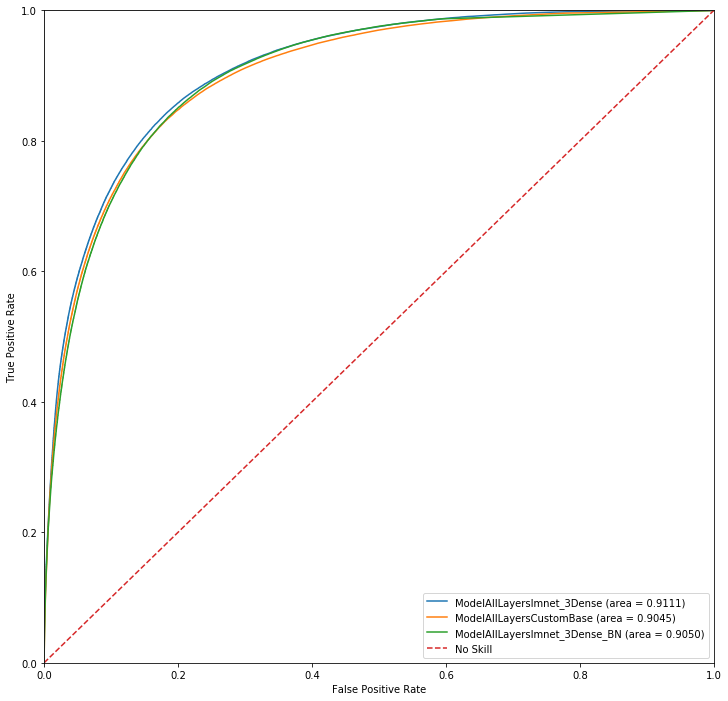

In [23]:
classiutils.roc_comparison([preds_eval_d3, preds_all_layers, preds_eval_d3_bn], actuals, model_names=['ModelAllLayersImnet_3Dense', 'ModelAllLayersCustomBase', 'ModelAllLayersImnet_3Dense_BN'])

In [27]:
classifications_preds_d3_t35 = classiutils.result_classifications(actuals,preds_eval_d3, threshold=0.35)
classifications_preds_d3_t38 = classiutils.result_classifications(actuals,preds_eval_d3, threshold=0.38)
classifications_preds_d3_t50 = classiutils.result_classifications(actuals,preds_eval_d3, threshold=0.50)

In [25]:
classifications_preds_d3_best_auc = classiutils.result_classifications(actuals,preds_eval_d3_best_auc)

In [158]:
classifications_preds_d3_1_t35 = classiutils.result_classifications(actuals,preds_eval_d3_1, threshold=0.35)
classifications_preds_d3_1_t38 = classiutils.result_classifications(actuals,preds_eval_d3_1, threshold=0.38)
classifications_preds_d3_1_t50 = classiutils.result_classifications(actuals,preds_eval_d3_1, threshold=0.50)

In [194]:
list(zip([a[0] for a in classifications_preds_d3_1_t50.values()],[a[0] for a in classifications_preds_d3_t50.values()]))

[(2048, 1715),
 (142, 69),
 (79, 54),
 (27, 34),
 (35, 26),
 (22, 26),
 (3423, 3650),
 (64, 28),
 (199, 211),
 (49, 38),
 (36, 37),
 (327, 374),
 (3, 5),
 (2250, 1742),
 (12, 12),
 (55, 51),
 (1, 0),
 (490, 506),
 (58, 10),
 (105, 44),
 (19, 18),
 (32, 14),
 (60, 23),
 (171, 113),
 (406, 371),
 (1, 0),
 (53, 13),
 (23, 3),
 (122, 63),
 (6, 0),
 (173, 116),
 (1730, 1445),
 (42, 29),
 (3211, 3447),
 (0, 0),
 (1615, 1684),
 (113, 111),
 (76, 62),
 (662, 731),
 (2718, 2670),
 (489, 427),
 (1368, 1632),
 (110, 82),
 (53, 20),
 (43, 29),
 (3, 3),
 (948, 990),
 (1, 0),
 (249, 226),
 (728, 618),
 (135, 149),
 (112, 60),
 (215, 120),
 (38, 54),
 (3155, 2818),
 (499, 553),
 (1, 1),
 (54, 44),
 (24, 19),
 (28, 24),
 (230, 281),
 (1135, 1041),
 (4799, 4969),
 (1391, 1390),
 (86, 90),
 (18, 4),
 (14, 4),
 (203, 166),
 (6, 0),
 (4, 1),
 (3550, 4273),
 (48, 49),
 (11, 0),
 (8327, 9528),
 (332, 150),
 (6451, 7340),
 (349, 152),
 (71, 4),
 (1, 1),
 (178, 170),
 (31, 9),
 (670, 283),
 (951, 597),
 (228,

In [28]:
d3_pres_recs_t35 = classiutils.calculate_pres_recall(actuals, preds_eval_d3, classifications_preds_d3_t35)
d3_pres_recs_t38 = classiutils.calculate_pres_recall(actuals, preds_eval_d3, classifications_preds_d3_t38)
d3_pres_recs_t50 = classiutils.calculate_pres_recall(actuals, preds_eval_d3, classifications_preds_d3_t50)

In [160]:
d3_1_pres_recs_t35 = classiutils.calculate_pres_recall(actuals, preds_eval_d3_1, classifications_preds_d3_1_t35)
d3_1_pres_recs_t38 = classiutils.calculate_pres_recall(actuals, preds_eval_d3_1, classifications_preds_d3_1_t38)
d3_1_pres_recs_t50 = classiutils.calculate_pres_recall(actuals, preds_eval_d3_1, classifications_preds_d3_1_t50)

In [35]:
f1_d3_t35 = dict(list(map(lambda x: (x[0],classiutils.calculate_f1score(x[1][0], x[1][1])), d3_pres_recs_t35.items())))
f1_d3_t38 = dict(list(map(lambda x: (x[0],classiutils.calculate_f1score(x[1][0], x[1][1])), d3_pres_recs_t38.items())))
f1_d3_t50 = dict(list(map(lambda x: (x[0],classiutils.calculate_f1score(x[1][0], x[1][1])), d3_pres_recs_t50.items())))

In [162]:
f1_d3_1_t35 = dict(list(map(lambda x: (x[0],classiutils.calculate_f1score(x[1][0], x[1][1])), d3_1_pres_recs_t35.items())))
f1_d3_1_t38 = dict(list(map(lambda x: (x[0],classiutils.calculate_f1score(x[1][0], x[1][1])), d3_1_pres_recs_t38.items())))
f1_d3_1_t50 = dict(list(map(lambda x: (x[0],classiutils.calculate_f1score(x[1][0], x[1][1])), d3_1_pres_recs_t50.items())))

In [164]:
prec_df = pd.DataFrame({"name": features, 
                      "d3_t35": [d[0] for d in d3_pres_recs_t35.values()],
                      "d3_t38": [d[0] for d in d3_pres_recs_t38.values()],
                      "d3_t50": [d[0] for d in d3_pres_recs_t50.values()],
                      "d3_1_t35": [d[0] for d in d3_1_pres_recs_t35.values()],
                      "d3_1_t38": [d[0] for d in d3_1_pres_recs_t38.values()],
                      "d3_1_t50": [d[0] for d in d3_1_pres_recs_t50.values()]})

rec_df = pd.DataFrame({"name": features, 
                      "d3_t35": [d[1] for d in d3_pres_recs_t35.values()],
                      "d3_t38": [d[1] for d in d3_pres_recs_t38.values()],
                      "d3_t50": [d[1] for d in d3_pres_recs_t50.values()],
                      "d3_1_t35": [d[0] for d in d3_1_pres_recs_t35.values()],
                      "d3_1_t38": [d[0] for d in d3_1_pres_recs_t38.values()],
                      "d3_1_t50": [d[0] for d in d3_1_pres_recs_t50.values()]})
f1_df = pd.DataFrame({"name": features, 
                      "d3_t35": list(f1_d3_t35.values()),
                      "d3_t38": list(f1_d3_t38.values()),
                      "d3_t50": list(f1_d3_t50.values()),
                      "d3_1_t35": list(f1_d3_1_t35.values()),
                      "d3_1_t38": list(f1_d3_1_t38.values()),
                      "d3_1_t50": list(f1_d3_1_t50.values())})

In [41]:
f1_df.set_index('name', inplace=True)

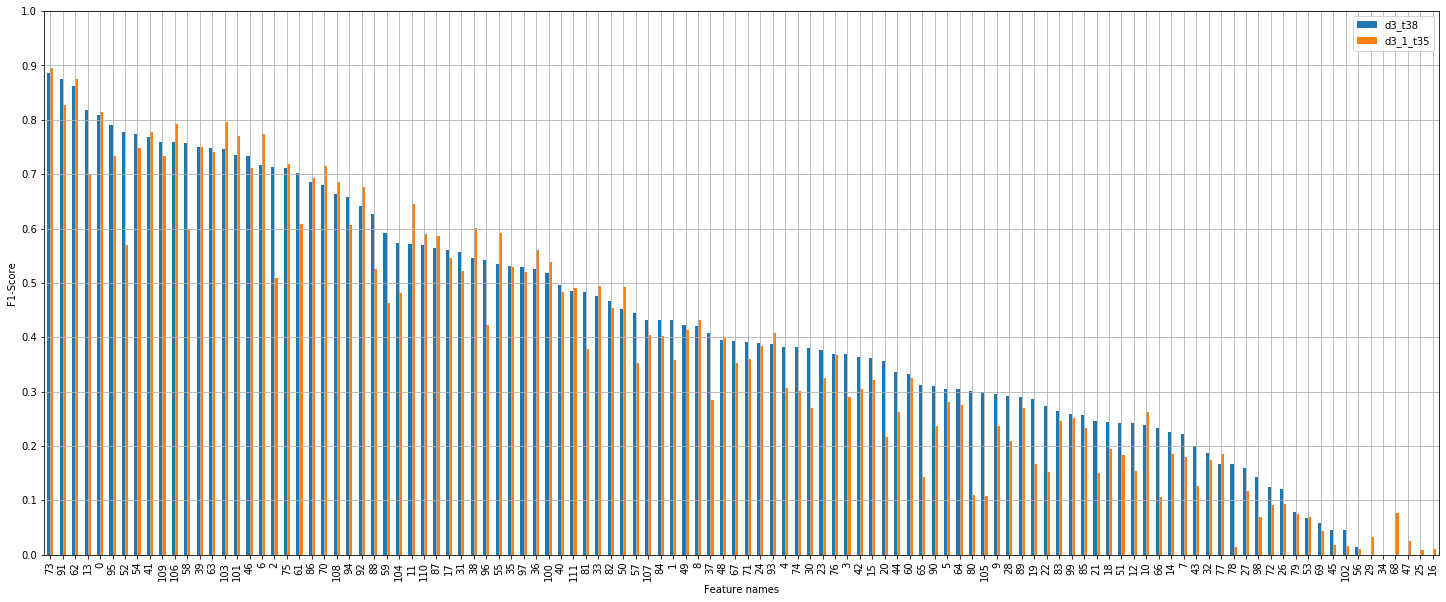

In [173]:
prec_df[['d3_t38','d3_1_t35']].sort_values('d3_t38', ascending=False).plot(kind='bar', figsize=(25,10), grid=True)
plt.xlabel("Feature names")
plt.ylabel("F1-Score")
plt.yticks([i/10 for i in range(11)], labels=[i/10 for i in range(11)])
plt.show()

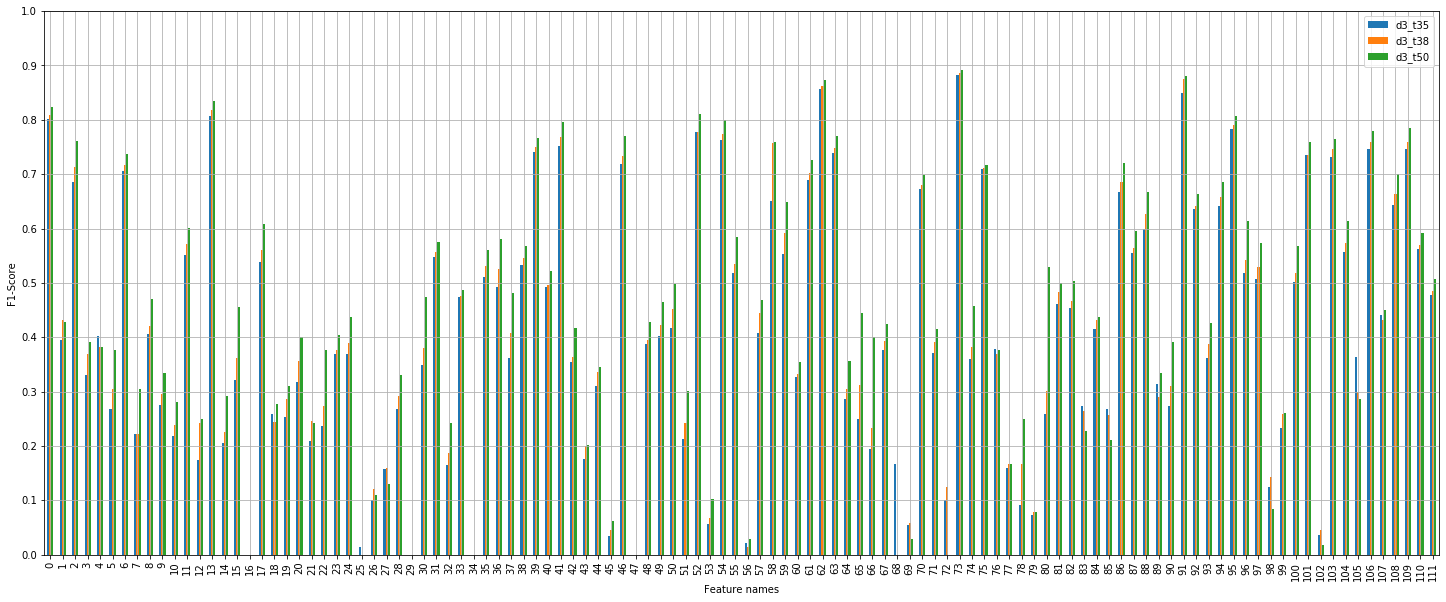

In [50]:
prec_df[['d3_t35','d3_t38','d3_t50']].plot(kind='bar', figsize=(25,10), grid=True)
plt.xlabel("Feature names")
plt.ylabel("F1-Score")
plt.yticks([i/10 for i in range(11)], labels=[i/10 for i in range(11)])
plt.show()

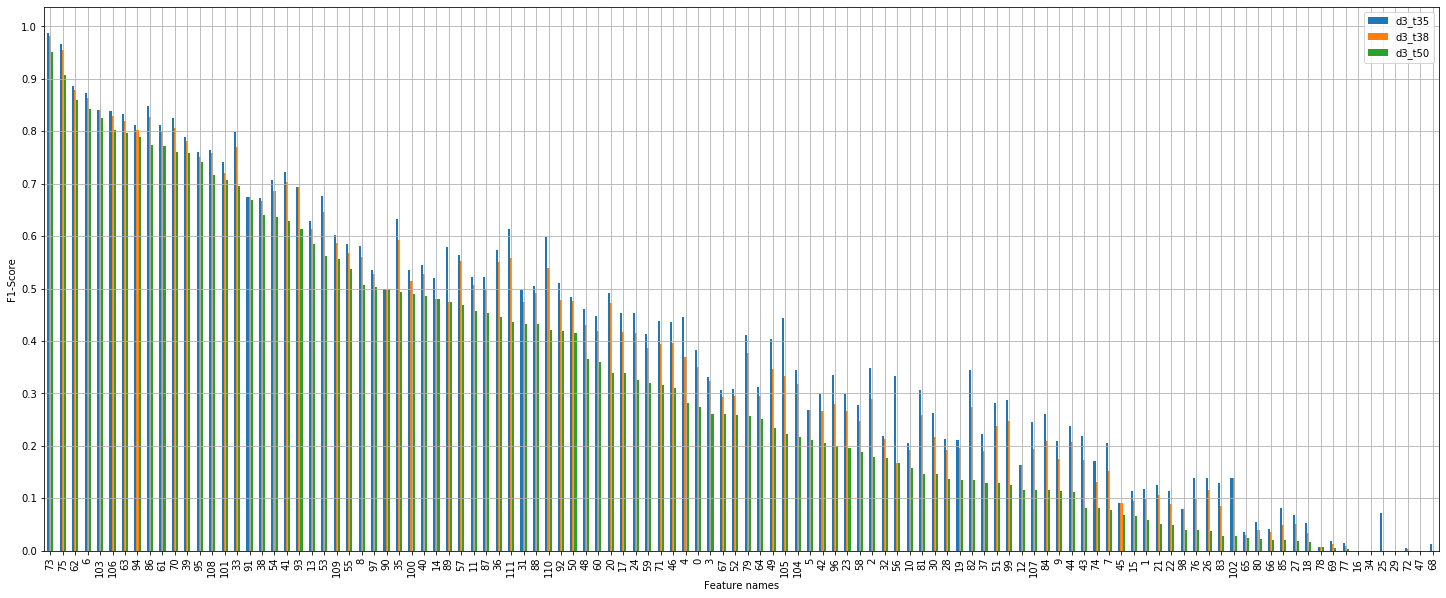

In [69]:
rec_df[['d3_t35','d3_t38','d3_t50']].sort_values('d3_t50',ascending=False).plot(kind='bar', figsize=(25,10), grid=True)
plt.xlabel("Feature names")
plt.ylabel("F1-Score")
plt.yticks([i/10 for i in range(11)], labels=[i/10 for i in range(11)])
plt.show()

In [68]:
training_df[features[63]].value_counts()

0.0    84142
1.0    12055
Name: Sleeve Length Sleeveless+Cap, dtype: int64

In [58]:
[i for i in (73,75)]

[73, 75]

In [82]:
a = rec_df.sort_values('d3_t50', ascending=False).head(40).index

In [83]:
b = prec_df.sort_values('d3_t50', ascending=False).head(40).index

In [84]:
c = f1_df.sort_values('d3_t50', ascending=False).head(40).index

In [90]:
top_index = set(a).intersection(set(c)).intersection(set(b))

In [105]:
f1_df.iloc[list(top_index)]

,name,d3_t35,d3_t38,d3_t50
6,Collar Type O Neck,0.781324,0.783866,0.786723
11,Collar Type Turn Down Collar,0.536341,0.537217,0.518724
13,Collar Type V Neck,0.707460,0.701478,0.688402
31,Fitness Loose,0.521030,0.512439,0.494017
36,Length Cropped/Ninth,0.530612,0.537255,0.504545
38,Length Maxi,0.595118,0.600473,0.601646
39,Length Midi,0.764981,0.765172,0.761878
41,Length Regular,0.736676,0.734447,0.702691
54,Pattern Solid Color,0.734302,0.727425,0.709109
55,Pattern Striped,0.549932,0.551107,0.559433


In [25]:
preds_all_layers_2 = np.load('preds_all_layers_2.npy')

In [111]:
preds_all_layers_2.shape

(11453, 112)

In [31]:
classifications_preds_all_layers_2 = classiutils.result_classifications(actuals, preds_all_layers_2)

In [32]:
all_layers_2_pres_recs = classiutils.calculate_pres_recall(actuals, preds_all_layers_2, classifications_preds_all_layers_2)

In [33]:
f1_all_layers_2 = dict(list(map(lambda x: (x[0],classiutils.calculate_f1score(x[1][0], x[1][1])), all_layers_2_pres_recs.items())))

In [36]:
comp_df = pd.DataFrame({"name": features,
                "AllLayers_F1":list(f1_all_layers_2.values()),
                "AllLayers_Precision": [a[0] for a in all_layers_2_pres_recs.values()],
                "AllLayers_Recall": [a[1] for a in all_layers_2_pres_recs.values()],
                "BestModel_F1": list(f1_d3_t35.values()),
                "BestModel_Precision": [a[0] for a in d3_pres_recs_t35.values()],
                "BestModel_Recall": [a[1] for a in d3_pres_recs_t35.values()]})

In [42]:
comp_df

,name,AllLayers_F1,AllLayers_Precision,AllLayers_Recall,BestModel_F1,BestModel_Precision,BestModel_Recall
0,Belt No,0.519227,0.775381,0.390291,0.506993,0.802768,0.370489
1,Belt Yes,0.174318,0.404321,0.111111,0.174380,0.416667,0.110263
2,Closure Type Elastic Waist,0.291777,0.723684,0.182724,0.431193,0.696296,0.312292
3,Collar Type Halterneck,0.289474,0.336735,0.253846,0.334661,0.347107,0.323077
4,Collar Type Hooded,0.366864,0.252033,0.673913,0.395722,0.389474,0.402174
...,...,...,...,...,...,...,...
107,Type TShirt Dress,0.128866,0.581395,0.072464,0.298851,0.440678,0.226087
108,Type Tank,0.685225,0.879121,0.561404,0.702265,0.651652,0.761404
109,Type Two-Piece Suites,0.677097,0.796524,0.588813,0.663851,0.752153,0.594104
110,Waist Line High Waist,0.631907,0.538053,0.765423,0.568324,0.562754,0.574006


In [46]:
import seaborn as sns

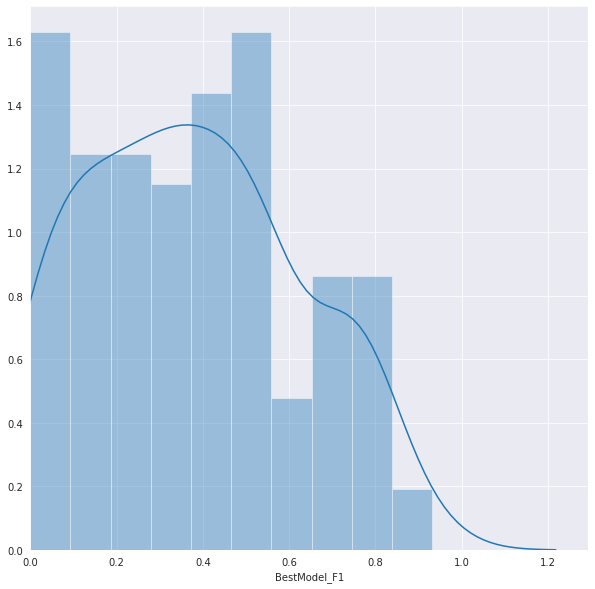

In [74]:
plt.figure(figsize=(10,10))
sns.distplot(comp_df.BestModel_F1, bins=10)

plt.ylim(0,None)
plt.xlim(0,None)
plt.show()

TypeError: 'Figure' object is not callable

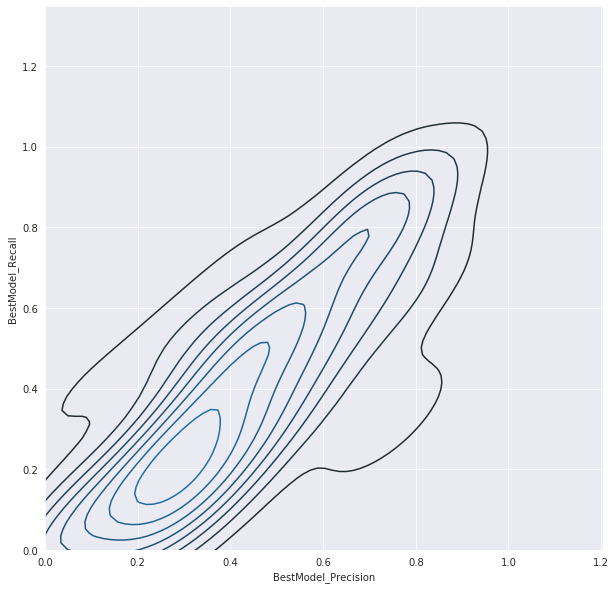

In [61]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,10))
sns.kdeplot(comp_df.BestModel_Precision, comp_df.BestModel_Recall)
plt.xlim(0,None)
plt.ylim(0,None)
plt.show()

### Comparison between Alllayers model and Alllayers-3Dense model

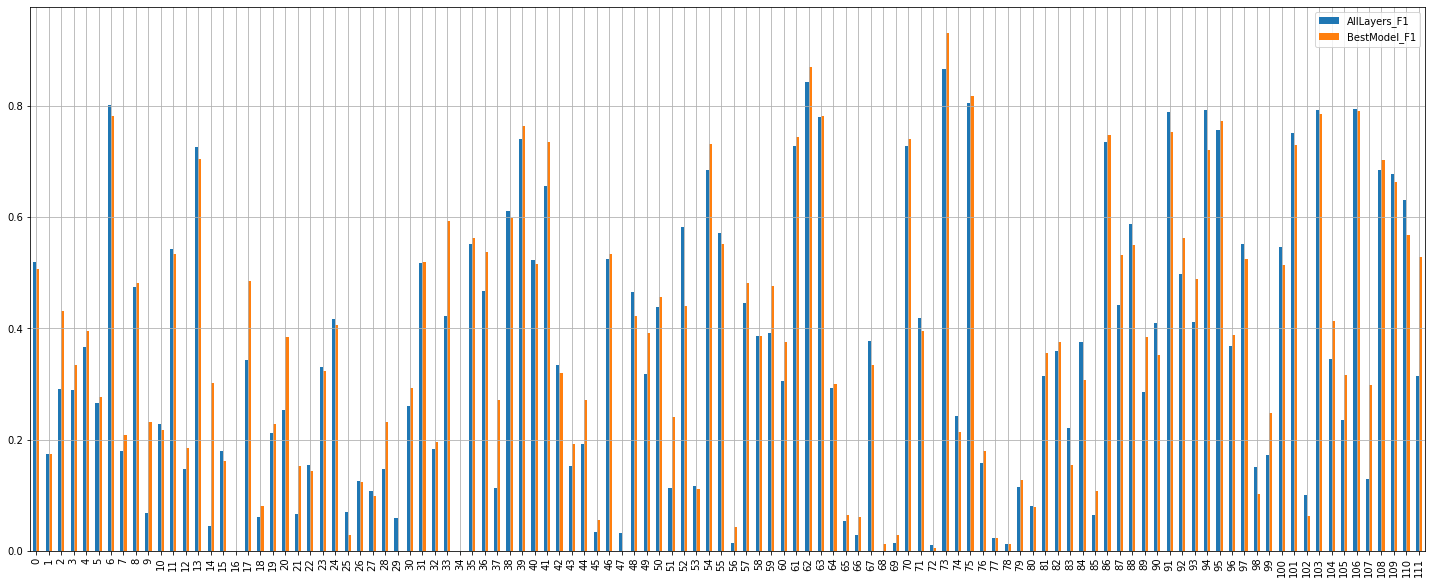

In [37]:
comp_df[['AllLayers_F1','BestModel_F1']].plot(kind='bar', figsize=(25,10), grid=True)

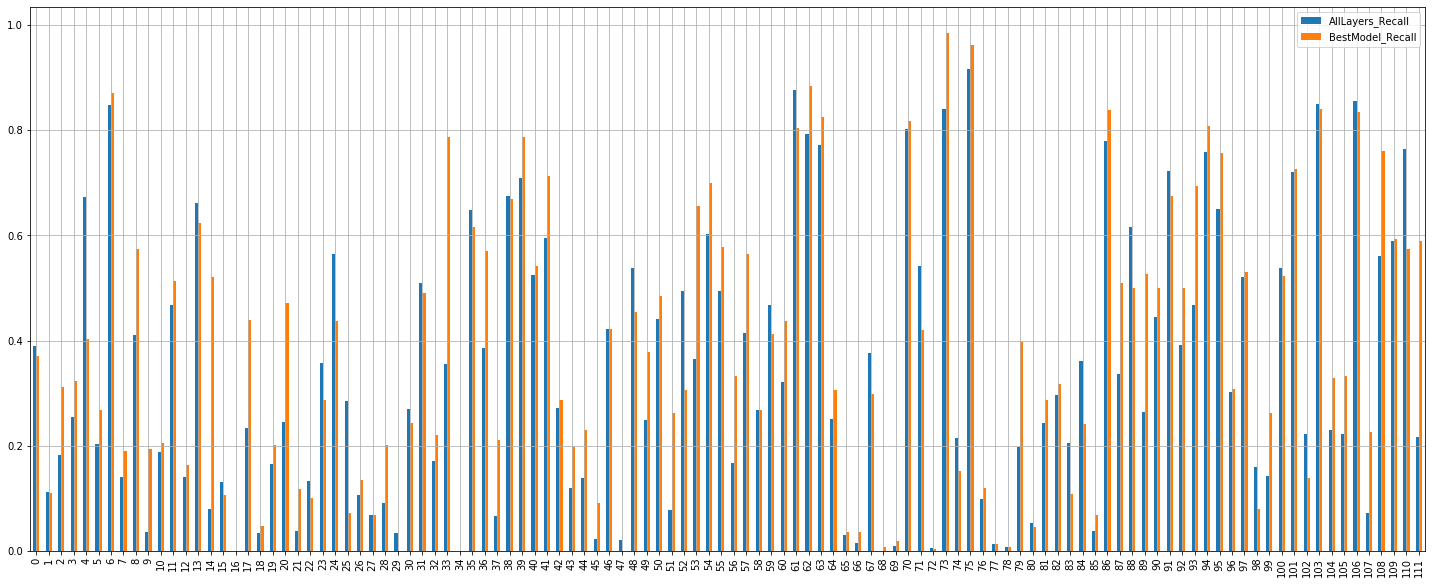

In [41]:
comp_df[['AllLayers_Recall','BestModel_Recall']].plot(kind='bar', figsize=(25,10), grid=True)
#plt.xticks(rotation=45)
plt.show()

### Features with f1-score > 0.7

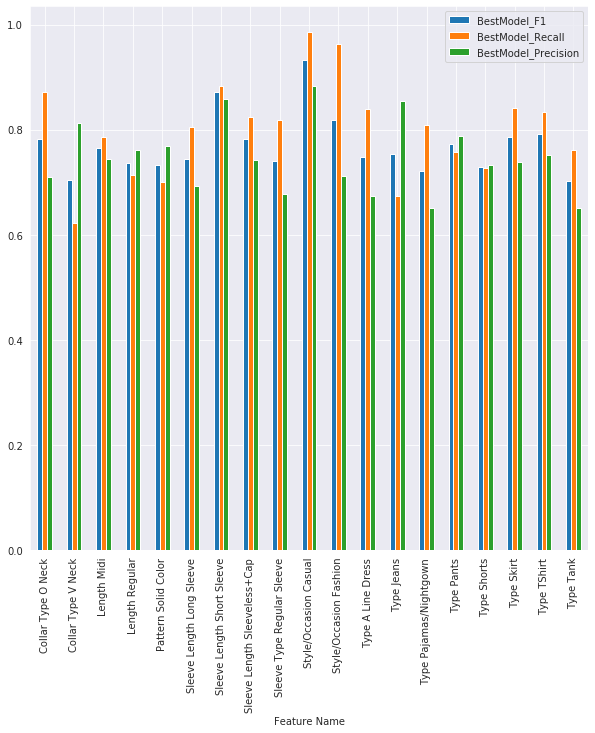

In [67]:
comp_df[(comp_df.BestModel_F1 > 0.7)][["name","BestModel_F1", "BestModel_Recall", "BestModel_Precision"]].plot(x='name',kind='bar', figsize=(10,10))
plt.xlabel("Feature Name")
plt.show()

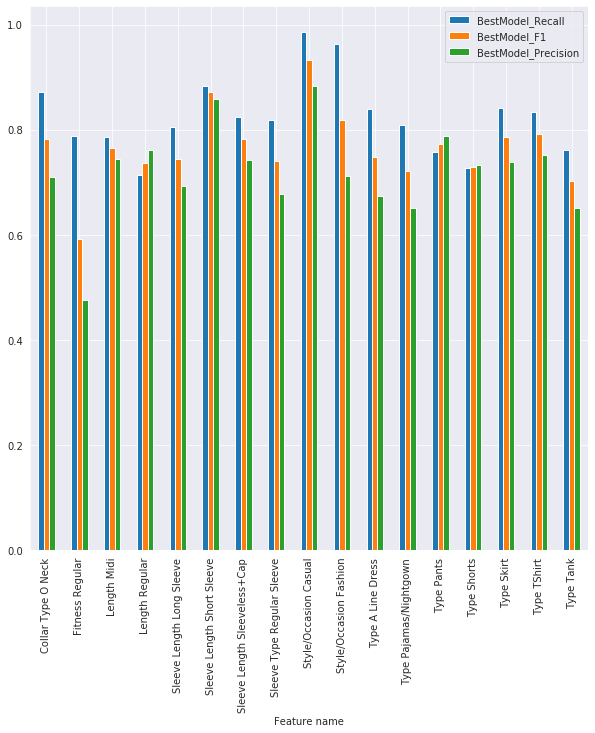

In [66]:
comp_df[(comp_df.BestModel_Recall > 0.7)][["name","BestModel_Recall", "BestModel_F1", "BestModel_Precision"]].plot(x='name', kind='bar', figsize=(10,10))
plt.xlabel("Feature name")
plt.show()

In [77]:
preds_eval_d3[1].shape

(112,)

In [82]:
def proba_to_labels(proba_list, threshold=0.5):
    return np.array([1 if i > threshold else 0 for i in proba_list])

    

In [95]:
np.argwhere(proba_to_labels(preds_eval_d3[4], threshold=0.3))

array([[  6],
       [ 19],
       [ 31],
       [ 33],
       [ 41],
       [ 49],
       [ 60],
       [ 62],
       [ 70],
       [ 73],
       [ 75],
       [ 76],
       [ 82],
       [ 84],
       [106]])

In [85]:
actuals[1].shape

(112,)

In [96]:
np.argwhere(actuals[4])

array([[ 13],
       [ 35],
       [ 41],
       [ 54],
       [ 62],
       [ 70],
       [ 73],
       [ 75],
       [ 76],
       [ 82],
       [ 83],
       [ 84],
       [100]])

In [97]:
features[62]

'Sleeve Length Short Sleeve'